In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
def split_sequence(sequence, n_steps):
  x = list()
  for i in range(len(sequence)):
    end_ix = i + n_steps
    if end_ix > len(sequence) - 1:
      break
    seq_x = sequence[i:end_ix]
    x.append(seq_x)
  return np.array(x)

In [ ]:
name = 'AMZN'
n_steps = 50
data = pd.read_csv(name + '.csv')
data = data.iloc[:,1:2].values
y_real = data[n_steps:]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
X = split_sequence(scaled_data, n_steps)
y = scaled_data[n_steps:]

In [ ]:
X_train = X[0:1259]
y_train = y[0:1259]
real_y_train = y_real[0:1259]
X_test = X[1260:]
y_test = y[1260:]
real_y_test = y_real[1260:]

In [ ]:
model = Sequential()
model.add(LSTM(units=64, activation='sigmoid', input_shape=(50, 1)))
model.add(Dense(units=1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
40/40 [==============================] - 1s 24ms/step - loss: 0.0764
Epoch 2/200
40/40 [==============================] - 1s 24ms/step - loss: 0.0245
Epoch 3/200
40/40 [==============================] - 1s 25ms/step - loss: 0.0218
Epoch 4/200
40/40 [==============================] - 1s 27ms/step - loss: 0.0190
Epoch 5/200
40/40 [==============================] - 1s 25ms/step - loss: 0.0162
Epoch 6/200
40/40 [==============================] - 1s 24ms/step - loss: 0.0132
Epoch 7/200
40/40 [==============================] - 1s 26ms/step - loss: 0.0102
Epoch 8/200
40/40 [==============================] - 1s 25ms/step - loss: 0.0075
Epoch 9/200
40/40 [==============================] - 1s 25ms/step - loss: 0.0050
Epoch 10/200
40/40 [==============================] - 1s 25ms/step - loss: 0.0029
Epoch 11/200
40/40 [==============================] - 1s 25ms/step - loss: 0.0014
Epoch 12/200
40/40 [==============================] - 1s 25ms/step - loss: 5.0544e-04
Epoch 13/200
40/40 [=

In [ ]:
predicted_y_test = model.predict(X_test)
predicted_y_test = scaler.inverse_transform(predicted_y_test)

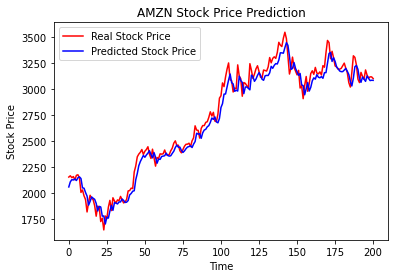

In [ ]:
plt.plot(real_y_test, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_y_test, color = 'blue', label = 'Predicted Stock Price')
plt.title(name + ' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
test_mse = math.sqrt(mean_squared_error(real_y_test, predicted_y_test))
print(test_mse)

83.85138735790149
